In [13]:
# import dependencies
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics, svm 
from sklearn.metrics import average_precision_score, precision_recall_curve, \
    plot_precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [25]:
# loading data
file_to_load = "../Resources/full_titanic.csv"

no_touchy = pd.read_csv(file_to_load)
full_data = no_touchy
full_data.head(2)

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_imp_median,Age_imp_mean
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,22.0
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,38.0


precision recall curve 

In [6]:
# creating X and y
X = full_data[['SibSp','Parch','Fare','Age_imp_median']]
y = full_data["Survived"].values.reshape(-1,1)
print(X.shape, y.shape)

# spliting data into training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a simple classifier
classifier = svm.LinearSVC(random_state=np.random.RandomState(0))
classifier.fit(X_train, y_train)
y_score = classifier.decision_function(X_test)

(891, 4) (891, 1)


/Users/davispage/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davispage/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [9]:
# computing the average precision score
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.56


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.56')

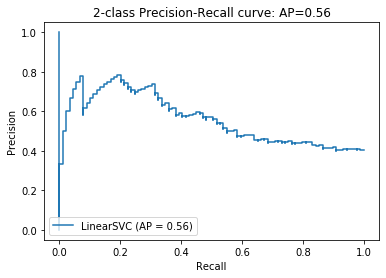

In [10]:
# plotting the precision-recall curve 
disp = plot_precision_recall_curve(classifier, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

In [15]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=np.random.RandomState(0))

n_classes = y.shape[1]

classifier = OneVsRestClassifier(svm.LinearSVC(random_state=np.random.RandomState(0)))
classifier.fit(X_train, Y_train)
y_score = classifier.decision_function(X_test)

/Users/davispage/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [24]:
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i],
                                                        y_score[:, i])
    average_precision[i] = average_precision_score(Y_test[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(Y_test.ravel(),
    y_score.ravel())
average_precision["micro"] = average_precision_score(Y_test, y_score,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

IndexError: too many indices for array

In [28]:
full_data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [34]:
(full_data.Survived.sum())/len(full_data)

0.3838383838383838